# Graph visualization example for Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

C:\Users\libphy\AppData\Local\Continuum\anaconda3\envs\sk22tf2\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv("Heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [4]:
df.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
### Below example shows how to use preprocessing pipeline in sklearn. Although you can manually clean up X, 
### using the pipeline can be convenient 

In [7]:
y = df['AHD']
X = df.drop('AHD',axis=1)

categorical_features = ['Sex','ChestPain', 'Thal']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

## You can add scaler if you want to scale the numeric features. For comparison, I didn't include here
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [8]:
len(X.columns)

13

In [9]:
clf.fit(X,y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [10]:
Xt = preprocessor.transform(X) #you can explicitly get transformed (preprocessed) X

In [11]:
Xt.shape # since we have categorical variables, it expanded columns

(303, 20)

In [12]:
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [13]:
#### Caution: using ColumnTransformer/Pipeline changes the clf object and the tree_ is no longer available so it's not compatible with the graphviz 

In [14]:
### you can pull the names of the categorical features by
new_cat_features=preprocessor.transformers_[1][1]['onehot']\
                         .get_feature_names(categorical_features)

In [15]:
### Below example is when using numpy array to visualize the tree
### Since it's numpy array, the visualization doesn't show the column (feature names)

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xt,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

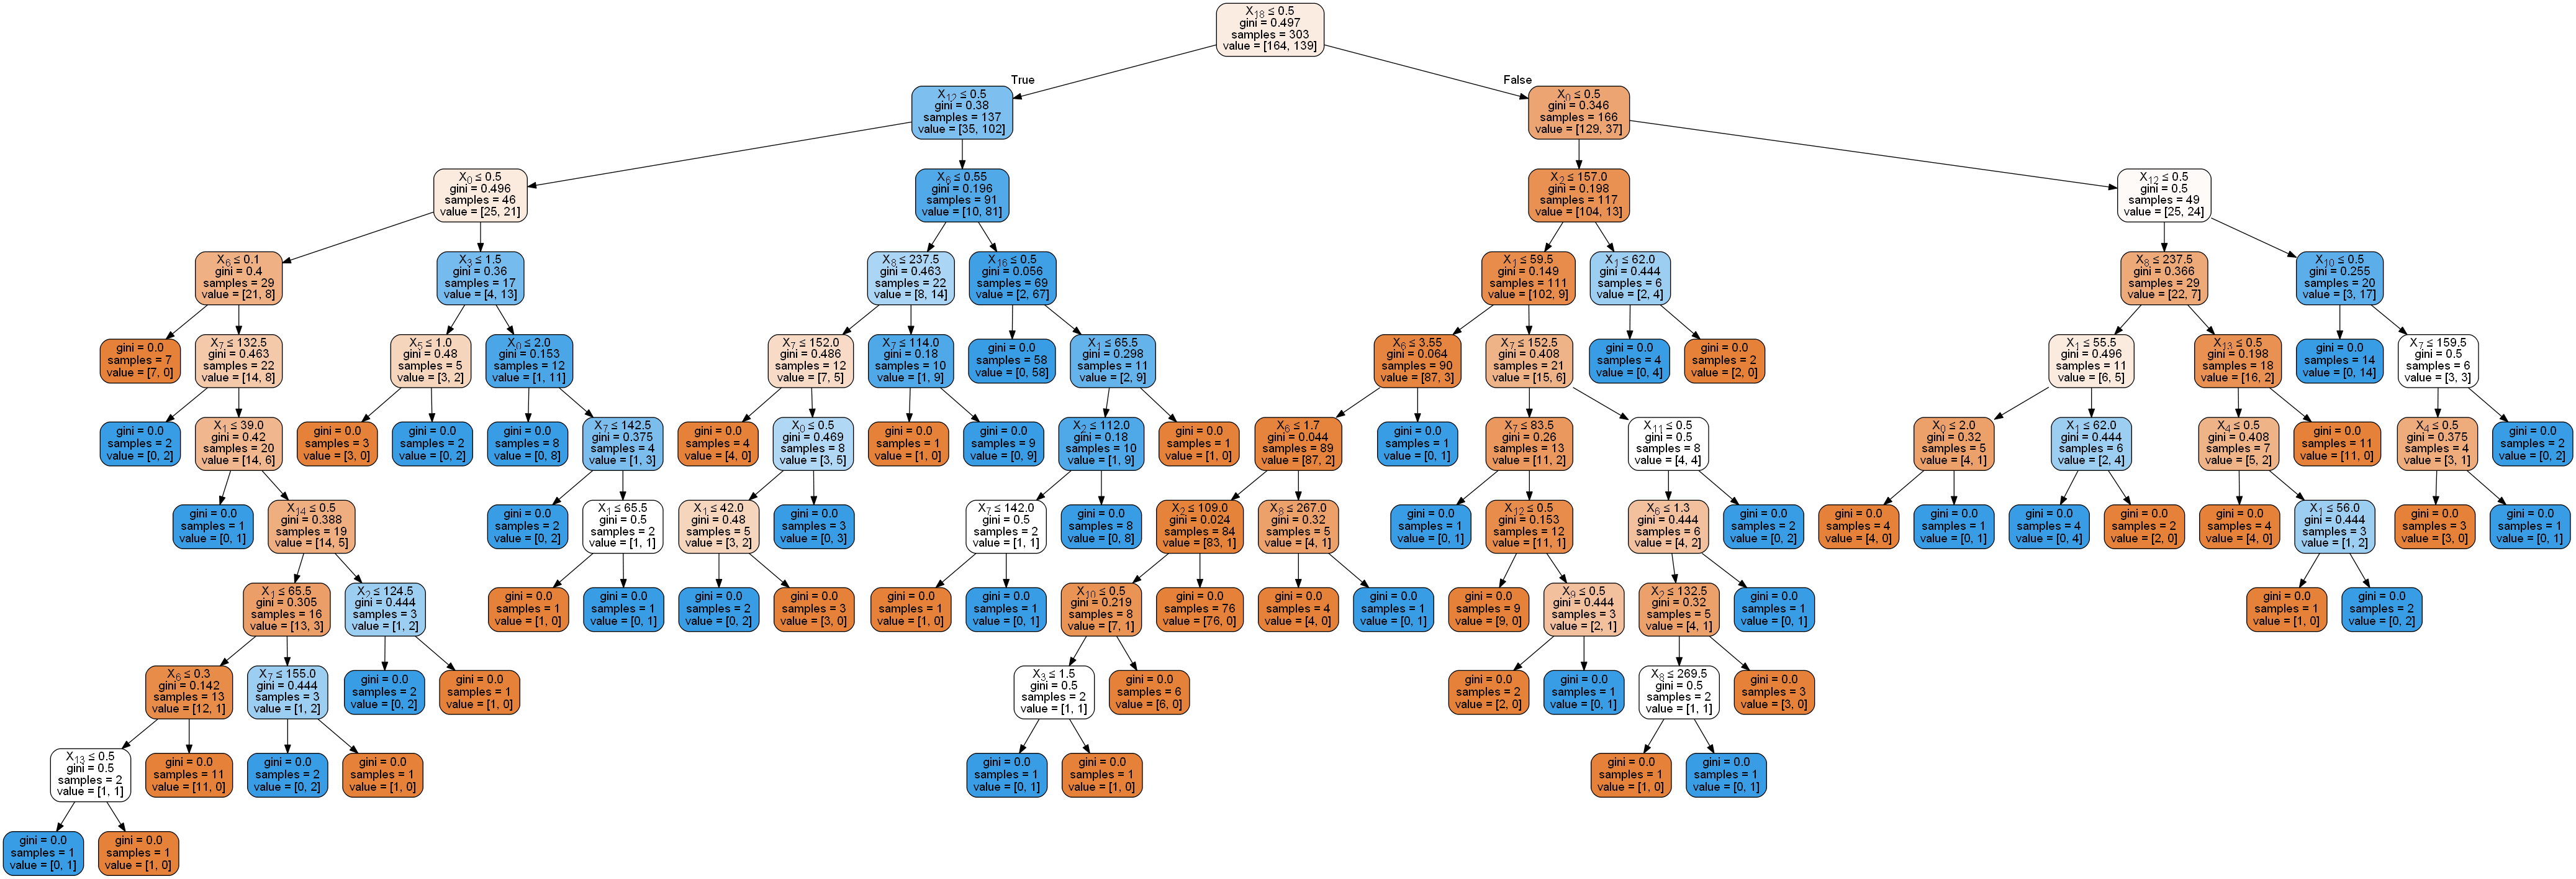

In [17]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(170.36574803149605, 207.55636363636364, 'X[18] <= 0.5\ngini = 0.497\nsamples = 303\nvalue = [164, 139]'),
 Text(84.35905511811023, 187.7890909090909, 'X[12] <= 0.5\ngini = 0.38\nsamples = 137\nvalue = [35, 102]'),
 Text(42.17952755905512, 168.0218181818182, 'X[0] <= 0.5\ngini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(23.725984251968505, 148.25454545454545, 'X[6] <= 0.1\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(18.453543307086612, 128.48727272727274, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(28.99842519685039, 128.48727272727274, 'X[7] <= 132.5\ngini = 0.463\nsamples = 22\nvalue = [14, 8]'),
 Text(23.725984251968505, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(34.270866141732284, 108.72, 'X[1] <= 39.0\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(28.99842519685039, 88.95272727272729, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(39.54330708661417, 88.95272727272729, 'X[14] <= 0.5\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Tex

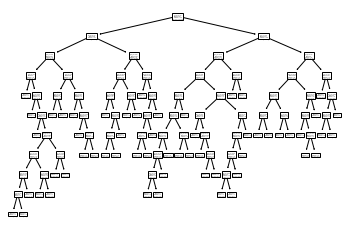

In [18]:
### There is another way to make the tree graph, but the visualization process is similar (we use export_graphviz)
from sklearn import tree
tree.plot_tree(clf.fit(Xt, y))

In [19]:
### We can add feature names since we know the order (note that it can be different from the original df.columns)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(numeric_features)+list(new_cat_features),class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)

In [20]:
import graphviz
graph = graphviz.Source(dot_data)

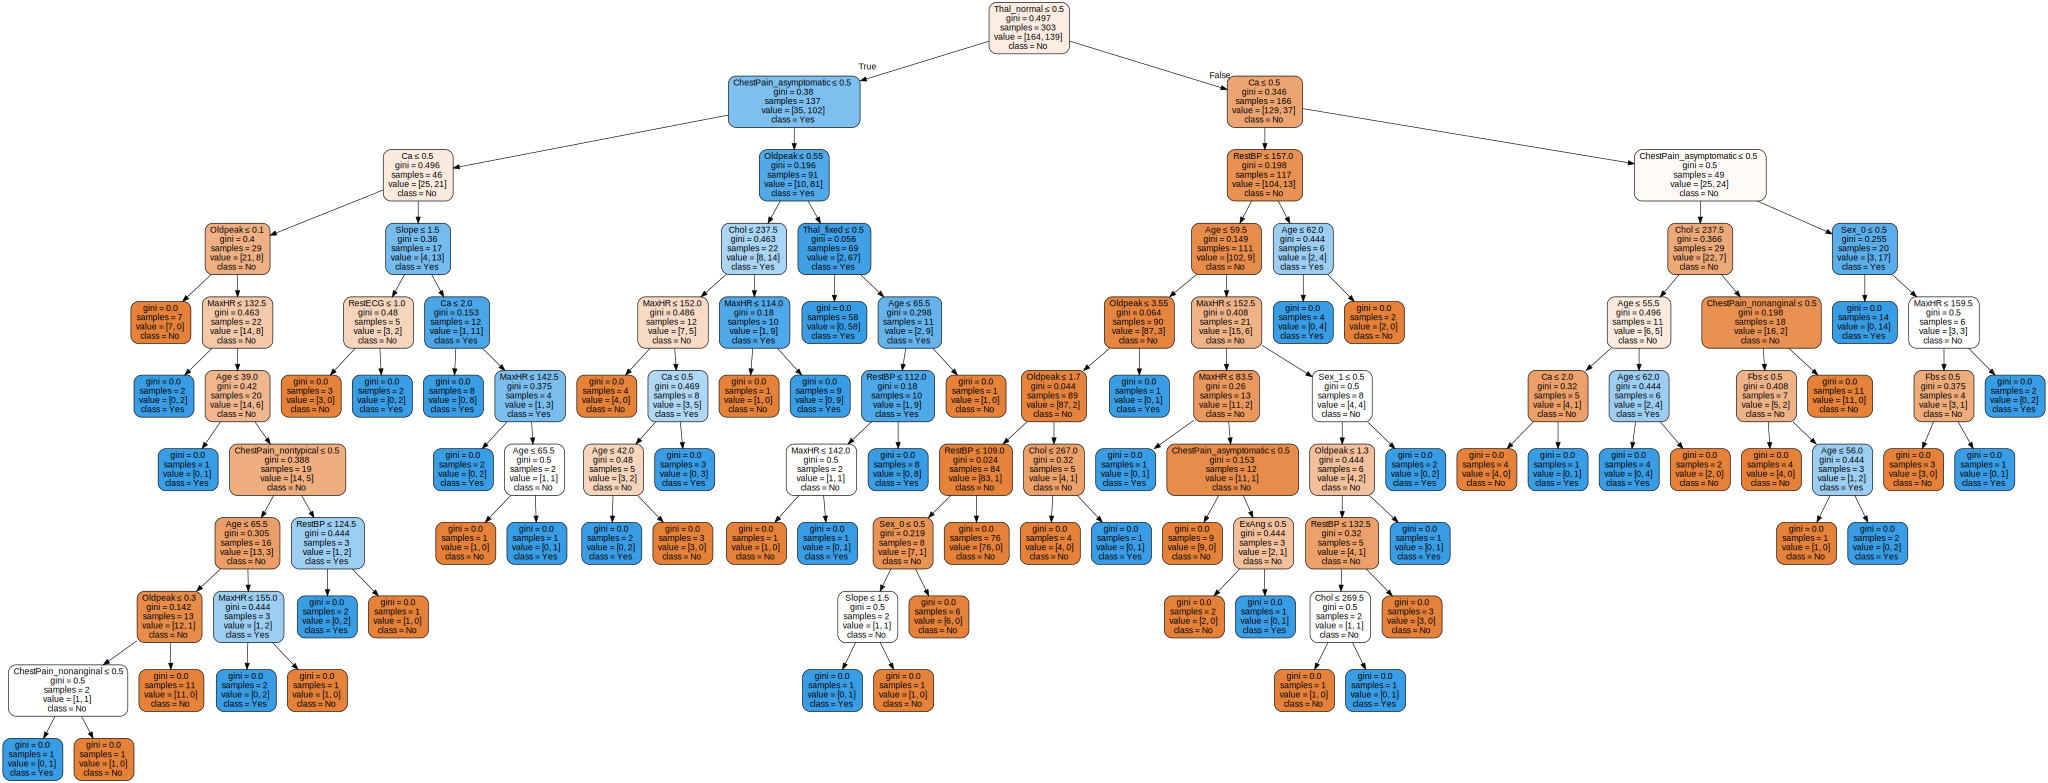

In [21]:
graph

# Exercise

### 1. Grow a decision tree classifier and change its options and visualize the tree to check what's happening
- 1.1 `max_depth`
- 1.2 `min_samples_split`
- 1.3 `min_samples_leaf`
- 1.4 `max_features`
- 1.5 `min_impurity_decrease`    
See the [document](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for details.
                   

In [22]:
clf = DecisionTreeClassifier()

In [23]:
clf.get_params() #check the default options

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [24]:
# First, the max_depth is None by default. Seeing the visualization above, the depth grows over 10. 
# So we can pick a max_depth that's smaller than 10, for example let's pick 5.
# Note that the example numbers here are for demo purpose and would not necessarily be the best choice.
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(Xt, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(numeric_features)+list(new_cat_features),class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

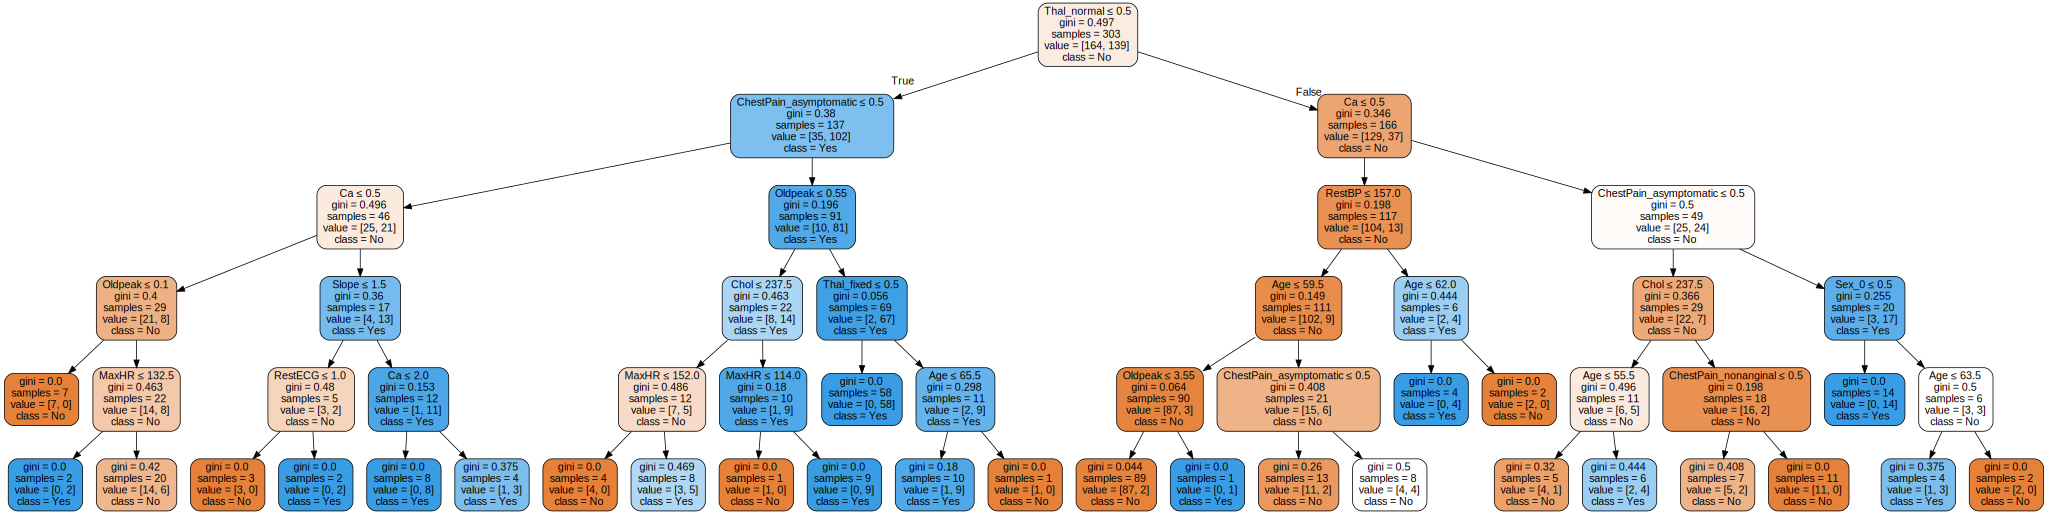

In [26]:
graph #the depth is upto 5. It means a node stops spliting at depth 5 even though the node is not pure.

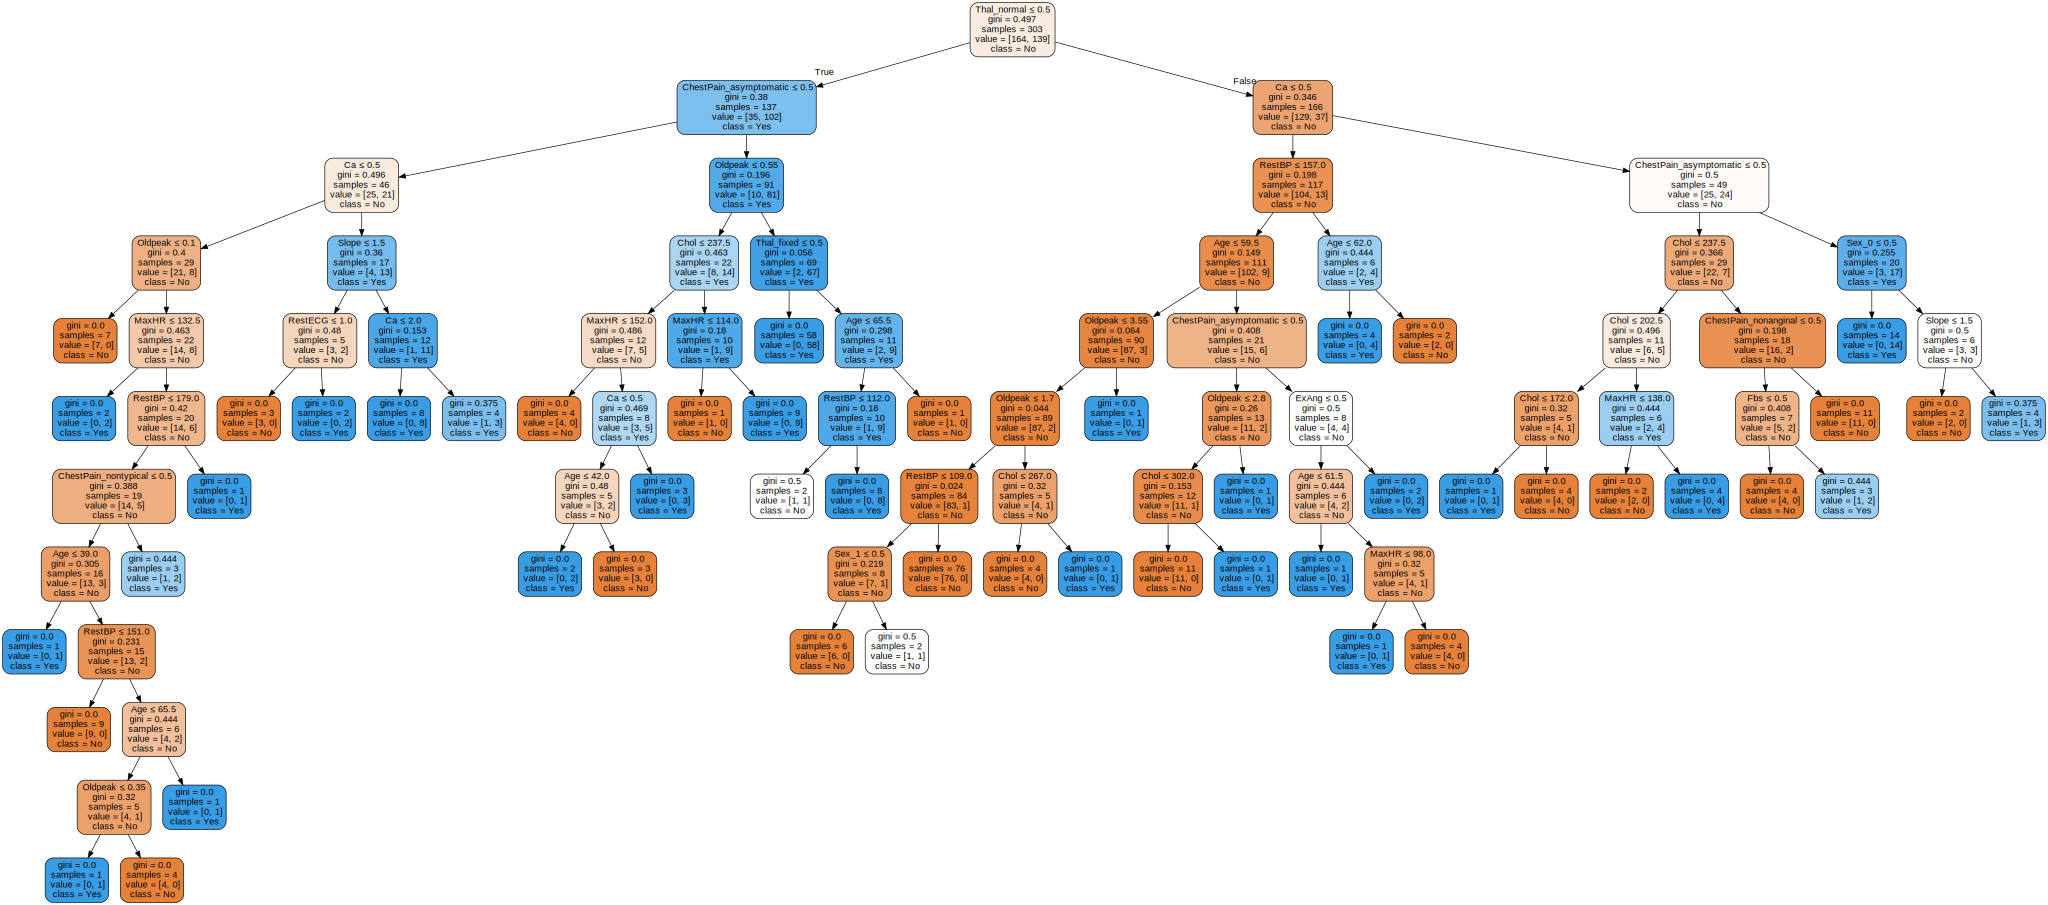

In [27]:
#min_samples_split requires a node to stop splitting if the sample numbers in the node is smaller than 5.
#Check the visualization below and ask yourself why some terminal nodes do not split even though it has much more than 5 samples. 
#The answer is because the node is already pure.
clf = DecisionTreeClassifier(min_samples_split=5)
clf.fit(Xt, y)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(numeric_features)+list(new_cat_features),class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

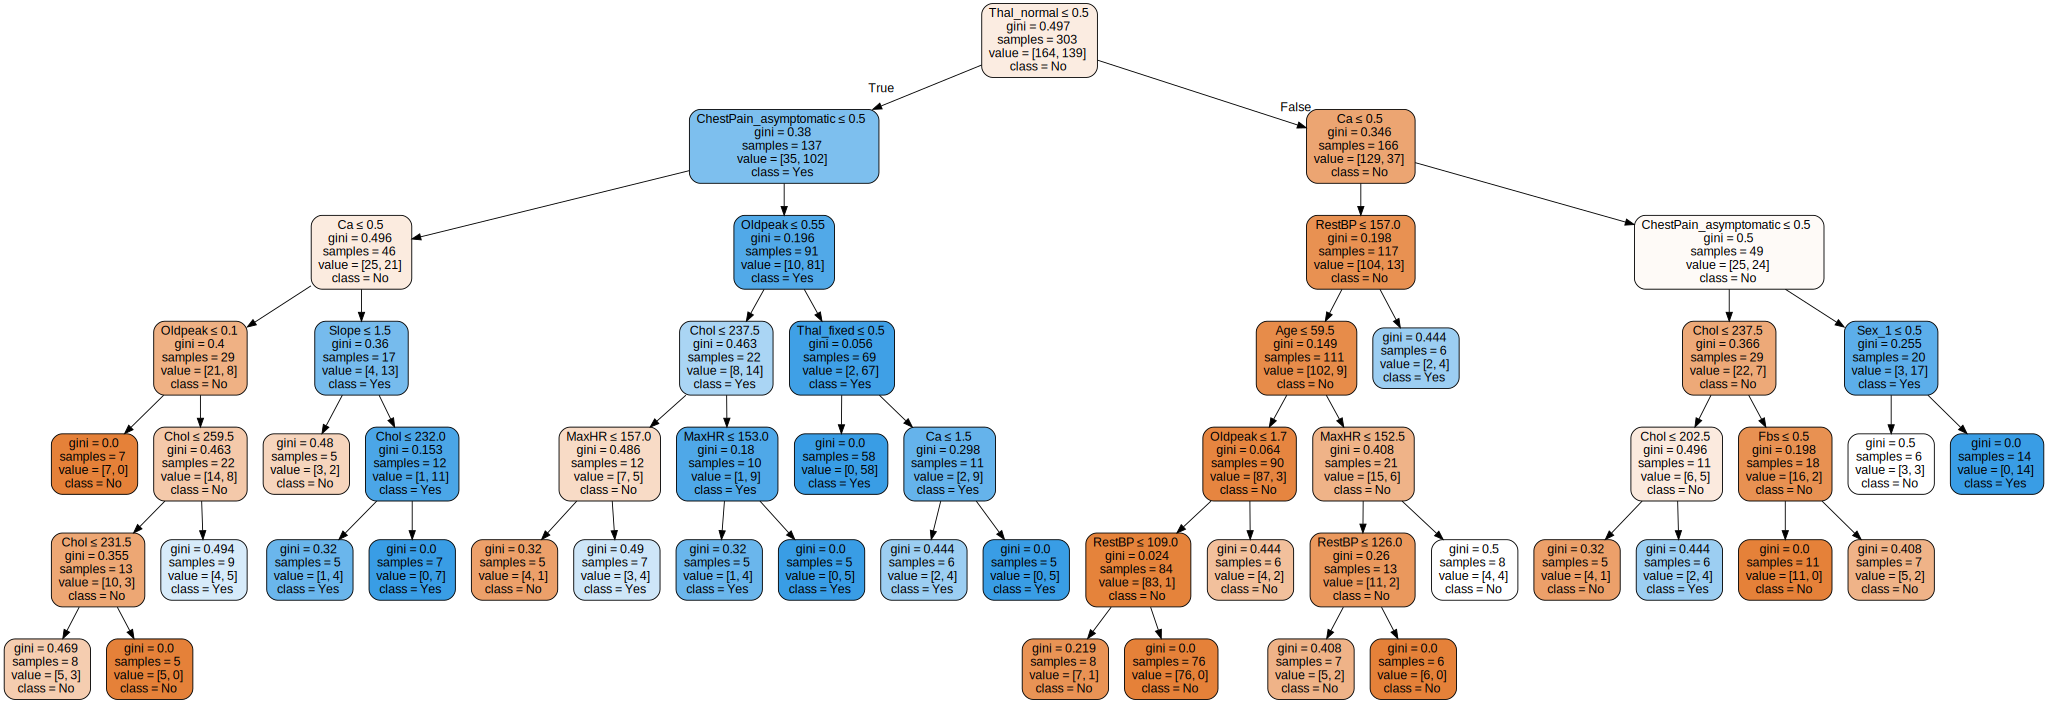

In [28]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(Xt, y)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(numeric_features)+list(new_cat_features),class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph
#In this case, the tree split such that the samples in the leaf nodes are at least 5.

In [29]:
#Omitting further procedures. 
#The important thing here is to get familiar with which knobs exist and how they affect to the tree growth.

### 2. Pick a performance metric (for classification) and optimize those tuning parameters. Does a tree perform better when fully grown or early stopped using those parameters?

In [30]:
# For classification performance metric, Acc (accurcy) is popular, 
# but sometimes if the labels are imbalanced it can cause a problem. so, let's check if that's the case.
y.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [31]:
# Although they are not perfectly balanced, they are more or less balanced, so perhaps using accuracy metric is fine.
y.value_counts()/y.count()

No     0.541254
Yes    0.458746
Name: AHD, dtype: float64

In [32]:
# Now we'll determine ranges of these hyperparameters. 
# There is no set rules for these, but you may guess some numbers based on previous visualization. 
# (e.g. the logic here is that I won't choose max_depth to be larger than the depth of a free-grown tree, and won't choose something very trivial, say depth 1.)
# Once we define the range and candidate values within, we will sweep across all the possible combinations of these candidate values.
# It's called grid search
param_space={
'max_depth' : [3, 5, 7, 9, None],
'min_samples_split' : [2, 3, 5],
'min_samples_leaf' : [1, 2, 3, 5],
'max_features' : [4, 8, None]}
# I'll skip min_impurity_decrease since I have no guess what's good candidate number(s) for this one.
#The number of iterations we need is 5*3*4*3 = 180
5*3*4*3

180

In [33]:
# sklearn has a convenient function that can do grid search, as well as cross validation.
# see more in https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, param_space, cv=5) #here, cv is taken care of by 5-fold cross validation internally.
#If you want to use different types of cv (e.g. stratified- which also takes care of class label imbalance), you can construct cv object.
# see more in https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
# and https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [34]:
clf.fit(Xt,y) #note that I didn't divide X into X_train and X_test, since I'm doing cross validation anyway, but if you want to make sure to test, you may set aside X_test for testing. 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9, None],
                    

In [35]:
clf.best_estimator_ #you can call the best performing estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
clf.best_params_ #directly shows best hyperparameters

{'max_depth': 3,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [37]:
clf.best_score_ #it gave the 0.82 accuracy from the cross-validation result. 
# Wait, how do I know if the metric used is accuracy? I didn't see it was specified in our models above..
# By default the grid search will follow the base estimator's metric default. In decision tree classifier, it's the accuracy.

0.8182513661202186

In [38]:
#If you're not sure what attribute command to type (clf.something as shown above), type "clf." and hit "tab" key.
#It will list attribute options you can use.

In [39]:
clf.cv_results_ #you can see the full result from cross validation

{'mean_fit_time': array([0.        , 0.        , 0.00312371, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00312419, 0.        , 0.00312524, 0.        , 0.        ,
        0.00312333, 0.        , 0.        , 0.        , 0.00312428,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0031208 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00313005,
        0.        , 0.        , 0.        , 0.00312428, 0.        ,
        0.        , 0.0031301 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0031249 , 0.        ,
        0.        , 0.        , 0.00312438, 0.        , 0.        ,
        0.00311809, 0.00313039, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00312471, 0.        , 0.        ,
        0.        , 0.        ,

In [40]:
# In fact, you can write a custom code (nested for loops for grid search) if you want.
# optionally you can set aside test dataset for test error measure.

### 3. Use post pruning and find optimal `ccp_alpha` 
See sklearn [0.22 dev user guide](https://scikit-learn.org/dev/_downloads/scikit-learn-docs.pdf) section 6.30.4 Post pruning decision trees with cost complexity pruning. Optimal ccp_alpha can be chosen where test performance is the best in the graph on the page 1527.

In [41]:
#change y to binary since the post pruning function doesn't like string categories
yt = y.apply(lambda x: 0 if x=='No' else 1)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11822023721672731


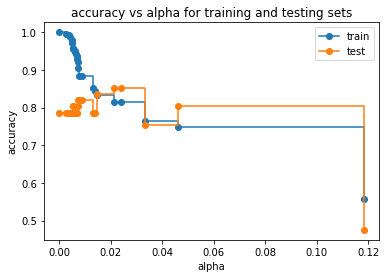

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier() #initialize
path = dt.cost_complexity_pruning_path(X_train, y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show() 

In [43]:
ccp_alphas[np.argmax(test_scores)] #this is the optimal ccp_alpha value

0.021061858251940888

In [44]:
np.max(test_scores) #the max test_score

0.8524590163934426

In [45]:
#Note that the post pruning yielded better results 
#than the grid search over the manually selected hyperparameter space using early stopping (regular pruning)

### 4. Use Random Forest and plot the performance vs. number of trees.
- 4.1 What is optimum value for the number of trees?
- 4.2 Get the feature importance and draw a bar chart

In [48]:
from sklearn.ensemble import RandomForestClassifier as RFC
import time #for measuring time

In [49]:
ntrees=[100, 200, 500, 1000, 5000, 10000]
clfs=[]
train_time=[]
for n in ntrees:
    t0=time.time()
    clf=RFC(n) #leave other options as default
    clf.fit(X_train, y_train)
    t1=time.time()
    clfs.append(clf)
    train_time.append(t1-t0)
    

Text(0, 0.5, 'training time(s)')

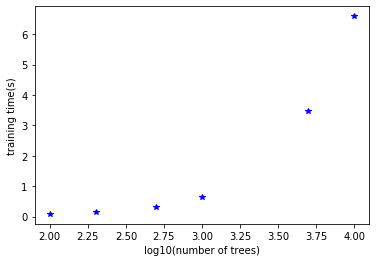

In [54]:
plt.plot(np.log10(ntrees),train_time,'b*')
plt.xlabel('log10(number of trees)')
plt.ylabel('training time(s)')

In [ ]:
# Checking the train and test performance vs. number of trees
# For a classification tasks, accuracy (ACC) is a natural choice as a performance metric.
# However, we need to check the class imbalance before we choose ACC as a performance metric.

In [57]:
print(y_train.sum()/len(y_train)) #fraction of 1s in the y_train labels
print(y_test.sum()/len(y_test)) #fraction of 1s in the y_test labels

0.44214876033057854
0.5245901639344263


In [59]:
#It seems they are around 50% +- <5% and more or less balanced, ACC is ok to use.
train_acc=[c.score(X_train,y_train) for c in clfs]
test_acc=[c.score(X_test,y_test) for c in clfs]

Text(0, 0.5, 'accuracy')

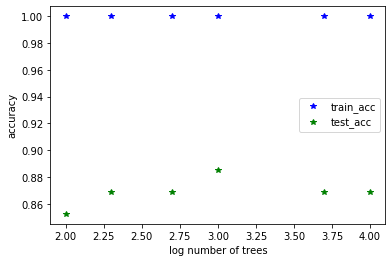

In [64]:
plt.plot(np.log10(ntrees), train_acc,'b*',label="train_acc")
plt.plot(np.log10(ntrees), test_acc,'g*',label="test_acc")
plt.legend()
plt.xlabel("log number of trees")
plt.ylabel("accuracy")

In [63]:
test_acc

[0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934]

In [ ]:
#the training score is perfect for all conditions (which is normal if a training is done for sufficiently long time)
# the test score is also good but we don't know the max value at n=1000 is by random chance or consistent.

In [65]:
ntrees=[100, 200, 500, 1000, 5000, 10000]
clfs=[]
train_time=[]
for n in ntrees:
    t0=time.time()
    clf=RFC(n, oob_score=True) #oob_score=True will use OOB for generalization accuracy 
    clf.fit(X_train, y_train)
    t1=time.time()
    clfs.append(clf)
    train_time.append(t1-t0)

In [67]:
test_acc = [x.score(X_test,y_test) for x in clfs]
oobs = [x.oob_score_ for x in clfs] # pull oob scores (you can think it as a validation score)

Text(0, 0.5, 'accuracy')

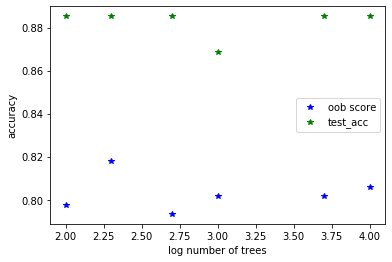

In [68]:
plt.plot(np.log10(ntrees), oobs,'b*',label="oob score")
plt.plot(np.log10(ntrees), test_acc,'g*',label="test_acc")
plt.legend()
plt.xlabel("log number of trees")
plt.ylabel("accuracy")

In [75]:
#Just by chance the test score is higher than validation score. You can see the n=1000 is not optimal any more, thus it was a fluctuation.
# You can run experiment multiple times to measure the fluctuation
ntrees=[100, 200, 500, 1000, 2000, 5000]
repeat=50
test_acc=[]
oob_scores=[]
rfs=[]
t0=time.time()
for m in range(repeat):
    clfs=[]
    for n in ntrees:
        clf=RFC(n, maxoob_score=True)  
        clf.fit(X_train, y_train)
        clfs.append(clf)
    t1=time.time()   
    rfs.append(clfs)
    oob_scores.append([x.oob_score_ for x in clfs])    
    test_acc.append([x.score(X_test,y_test) for x in clfs])
    if m%10==0:    #when you do many iterations of a time-consuming computation, always time them and monitor.
        print(m,t1-t0,'s elapsed') 

0 6.107965469360352 s elapsed
10 77.05222249031067 s elapsed
20 151.48740410804749 s elapsed
30 227.33929061889648 s elapsed
40 321.5473003387451 s elapsed


In [88]:
oob_scores = np.array(oob_scores)
print(oob_scores.shape)
test_acc = np.array(test_acc)
print(test_acc.shape)

(50, 6)
(50, 6)


In [ ]:
#tip: if you want to search possible attributes or methods of an object, type the object name and . and press "tab" key.
# e.g. clf. (and press tab) will give a dropdown of possible keys you can pull.

In [79]:
oob_scores.mean(axis=0)

array([0.80016529, 0.80520661, 0.80454545, 0.80363636, 0.80479339,
       0.80107438])

In [80]:
oob_scores.std(axis=0)

array([0.01354868, 0.01154099, 0.00806579, 0.00682707, 0.00563925,
       0.00445132])

Text(0, 0.5, 'accuracy')

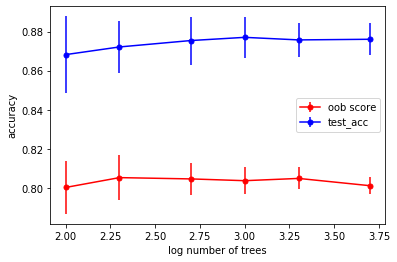

In [95]:
plt.errorbar(x=np.log10(ntrees),y=oob_scores.mean(axis=0),yerr=oob_scores.std(axis=0),marker='o',ms=5,c='r',label="oob score")
plt.errorbar(np.log10(ntrees), test_acc.mean(axis=0), test_acc.std(axis=0),marker='o',ms=5,c='b',label="test_acc")
plt.legend()
plt.xlabel("log number of trees")
plt.ylabel("accuracy")

In [ ]:
#It seems number of trees = 100 is already good enough. It could because the data is simple

In [118]:
# feature importance
rf=RFC(100,  max_features=None, oob_score=True)  
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
X_train.shape

(242, 20)

In [119]:
rf.feature_importances_

array([0.13979263, 0.08183846, 0.07132802, 0.03746919, 0.00635083,
       0.01308099, 0.11021088, 0.07658762, 0.08172506, 0.02518936,
       0.01655042, 0.01838829, 0.14987435, 0.00802628, 0.00797099,
       0.01021482, 0.00388911, 0.00309164, 0.09127624, 0.04714482])

In [125]:
all_features = numeric_features + list(new_cat_features) #note that the oder is defined in the pipeline above

In [126]:
all_features

['Ca',
 'Age',
 'RestBP',
 'Slope',
 'Fbs',
 'RestECG',
 'Oldpeak',
 'MaxHR',
 'Chol',
 'ExAng',
 'Sex_0',
 'Sex_1',
 'ChestPain_asymptomatic',
 'ChestPain_nonanginal',
 'ChestPain_nontypical',
 'ChestPain_typical',
 'Thal_fixed',
 'Thal_missing',
 'Thal_normal',
 'Thal_reversable']

In [128]:
list(np.array(all_features)[list(np.argsort(rf.feature_importances_))]) #ordered feature list

['Thal_missing',
 'Thal_fixed',
 'Fbs',
 'ChestPain_nontypical',
 'ChestPain_nonanginal',
 'ChestPain_typical',
 'RestECG',
 'Sex_0',
 'Sex_1',
 'ExAng',
 'Slope',
 'Thal_reversable',
 'RestBP',
 'MaxHR',
 'Chol',
 'Age',
 'Thal_normal',
 'Oldpeak',
 'Ca',
 'ChestPain_asymptomatic']

In [141]:
fi = np.array(list(zip(list(np.array(all_features)[list(np.argsort(rf.feature_importances_))]),np.sort(rf.feature_importances_)[::-1])))

In [142]:
fi

array([['Thal_missing', '0.14987434638571914'],
       ['Thal_fixed', '0.1397926291343616'],
       ['Fbs', '0.11021088496673963'],
       ['ChestPain_nontypical', '0.0912762400418275'],
       ['ChestPain_nonanginal', '0.0818384551678851'],
       ['ChestPain_typical', '0.08172506376980258'],
       ['RestECG', '0.07658761664741202'],
       ['Sex_0', '0.07132802278096324'],
       ['Sex_1', '0.04714481537131576'],
       ['ExAng', '0.03746919476404728'],
       ['Slope', '0.02518936253464647'],
       ['Thal_reversable', '0.018388290236236223'],
       ['RestBP', '0.016550421021795603'],
       ['MaxHR', '0.013080987110913572'],
       ['Chol', '0.010214820391716468'],
       ['Age', '0.008026279509816055'],
       ['Thal_normal', '0.007970989456673646'],
       ['Oldpeak', '0.00635083221404696'],
       ['Ca', '0.0038891071411567223'],
       ['ChestPain_asymptomatic', '0.0030916413529245416']], dtype='<U22')

<BarContainer object of 20 artists>

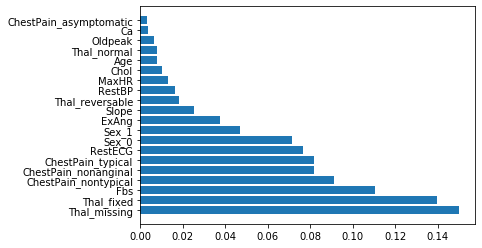

In [158]:
plt.barh(fi[:,0],fi[:,1].astype('float'))

### 5. Compare the performance of an optimized single tree and an optimized random forest ensemble in a graph where the y-axis is test error and the x-axis is number of trees.
(That means, the single tree is shown as a flat line)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11822023721672731


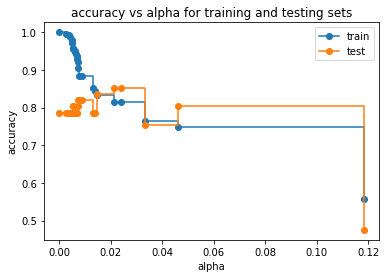

In [96]:
#re-doing the DT (use the same data)
dt = DecisionTreeClassifier() #initialize
path = dt.cost_complexity_pruning_path(X_train, y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [97]:
ccp_alphas[np.argmax(test_scores)]

0.021061858251940888

In [98]:
max(test_scores) #this number is the best test score for optimized (post-pruned) DT

0.8524590163934426

In [ ]:
#an unoptimized RF is already better (~0.87)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11822023721672731


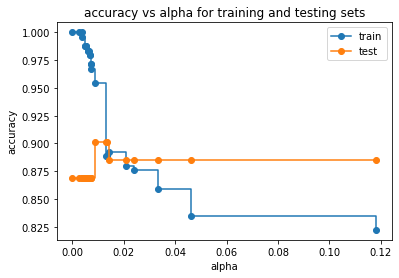

In [161]:
rf = RFC(100,  max_features=None, oob_score=True) #initialize (just used the setting as above, but you can explpore different options)
path = dt.cost_complexity_pruning_path(X_train, y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs_rf = []
for ccp_alpha in ccp_alphas:
    clf = RFC(100,  max_features=None, oob_score=True, random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_rf.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = [clf.score(X_train, y_train) for clf in clfs_rf]
test_scores = [clf.score(X_test, y_test) for clf in clfs_rf]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [162]:
max(test_scores) 

0.9016393442622951

In [163]:
ccp_alphas[np.argmax(test_scores)]

0.008815426997245177

In [ ]:
#with a post pruning, a RF (without using significant tricks) gave 90% acc.
#tip: if the data was a bit imbalanced, the option class_weight='balanced' will also improve the performance